In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [2]:
os.chdir(r"C:\Users\Dan Masibo\Documents\Python Projects")

In [3]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#df.info()

In [5]:
df.isnull().sum().sum()

6965

In [6]:
# Average SalePrice by Year

SalePrice_vs_YrSold=df[['YrSold', 'SalePrice']].groupby('YrSold', 
                                                        as_index=False).mean().sort_values(by='SalePrice', 
                                                                                           ascending=False)
SalePrice_vs_YrSold

,YrSold,SalePrice
1,2007,186063.151976
0,2006,182549.458599
3,2009,179432.103550
4,2010,177393.674286
2,2008,177360.838816


Text(0.5, 1.0, 'SalePrice_vs_YrSold')

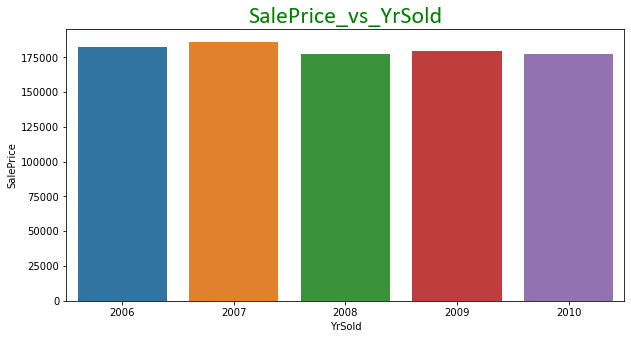

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x=SalePrice_vs_YrSold.YrSold, y=SalePrice_vs_YrSold.SalePrice)
plt.title('SalePrice_vs_YrSold', color='green', fontsize=24, fontname='Calibri')

In [8]:
# Average SalePrice by SaleCondition

SalePrice_vs_SaleCondition=df[['SaleCondition', 'SalePrice']].groupby('SaleCondition', 
                                                                      as_index=False).mean().sort_values(by='SalePrice', 
                                                                                                         ascending=False)
SalePrice_vs_SaleCondition

,SaleCondition,SalePrice
5,Partial,272291.752000
4,Normal,175202.219533
2,Alloca,167377.416667
3,Family,149600.000000
0,Abnorml,146526.623762
1,AdjLand,104125.000000


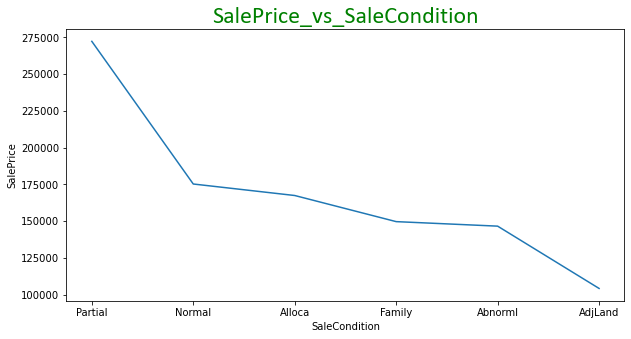

In [40]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=SalePrice_vs_SaleCondition, x="SaleCondition", y="SalePrice")
plt.title('SalePrice_vs_SaleCondition', color='green', fontsize=24, fontname='Calibri')
plt.show()

Text(0.5, 1.0, 'SalePrice_vs_SaleCondition')

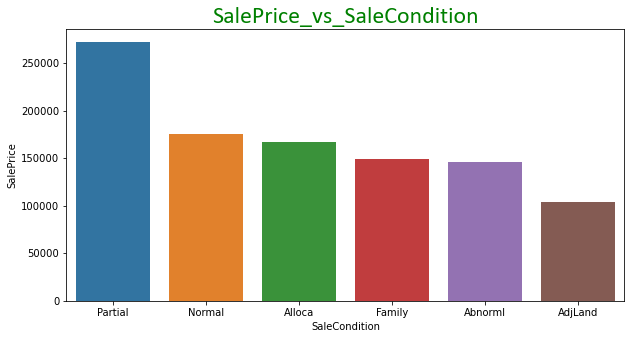

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(data=SalePrice_vs_SaleCondition, x='SaleCondition', y='SalePrice')
plt.title('SalePrice_vs_SaleCondition', color='green', fontsize=24, fontname='Calibri')

In [11]:
# Average SalePrice by SaleType

SalePrice_vs_SaleType=df[['SaleType', 'SalePrice']].groupby('SaleType', 
                                                            as_index=False).mean().sort_values(by='SalePrice', 
                                                                                               ascending=False)
SalePrice_vs_SaleType

,SaleType,SalePrice
6,New,274945.418033
2,Con,269600.000000
1,CWD,210600.000000
4,ConLI,200390.000000
8,WD,173401.836622
0,COD,143973.255814
5,ConLw,143700.000000
3,ConLD,138780.888889
7,Oth,119850.000000


Text(0.5, 1.0, 'SalePrice_vs_SaleType')

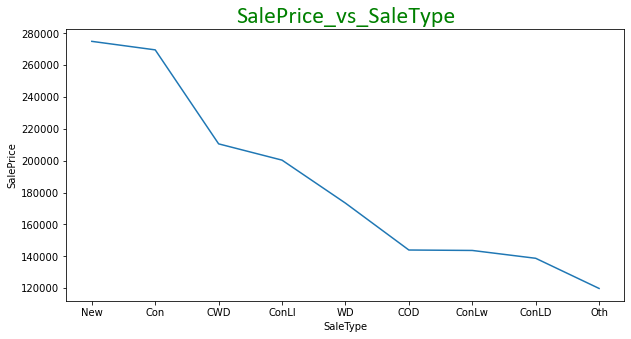

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=SalePrice_vs_SaleType, x='SaleType', y='SalePrice')
plt.title('SalePrice_vs_SaleType', color='green', fontsize=24, fontname='Calibri')

In [13]:
 df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
# segmenting the dataset into training and testing

X_train, X_test, y_train, y_test=train_test_split(df.drop(['Id', 'SalePrice'], 1), 
                                                  df['SalePrice'], test_size=.2, random_state=0)

C:\Users\Dan Masibo\AppData\Local\Temp\ipykernel_9632\140666138.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test=train_test_split(df.drop(['Id', 'SalePrice'], 1),


In [15]:
X_train.shape, X_test.shape

((1168, 79), (292, 79))

In [16]:
num_cols=[col for col in X_train.columns if X_train[col].dtypes!='O']
# num_cols

In [17]:
cat_cols=[col for col in X_train.columns if X_train[col].dtypes=='O']
# cat_cols

In [18]:
num_pp=Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    ('num_rob', RobustScaler())
])

cat_pp=Pipeline([
    ('cat_imp', SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')),
    ('cat_ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [19]:
from sklearn.impute import MissingIndicator

In [20]:
ct=ColumnTransformer([
    ('mi', MissingIndicator(), X_train.columns),
    ('num_pp', num_pp, num_cols),
    ('cat_pp', cat_pp, cat_cols)
])

In [21]:
xt=ct.fit_transform(X_train)
xt

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [22]:
pd.DataFrame(xt).head()

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
pd.DataFrame(xt).shape

(1168, 318)

In [24]:
pd.DataFrame(ct.transform(X_test)).head()

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Principal Component Analusis

 For dimensionality reduction by:
   - Removing inconsistences
   - Removing redundant data
   - Removing highly correlated features

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=200)

In [26]:
pipe_final=Pipeline([
    ('ct_step', ct),
    ('pca', PCA(n_components=200)),
    ('model', DecisionTreeClassifier())
])

In [27]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('ct_step',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       '...
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('pca', PCA(n_components=200)),
                ('model', DecisionTreeClassifier())])

In [28]:
y_pred=pipe_final.predict(X_test)
y_pred

array([187000,  93000, 175000, 145000,  39300,  95000, 501837,  60000,
       305000, 153900, 219500,  95000, 305900, 127000, 158900, 127000,
       179200, 134500, 112000, 115000, 127500, 187000, 127000, 129500,
       195000, 132500, 187000,  55993, 276000, 114500, 196000, 556581,
       153575, 179600, 485000, 139900, 254000, 109500, 179600, 354000,
       135000, 128950, 213000, 255500, 215000, 129500, 118000, 125000,
       256000, 134900, 395192, 146500, 169500, 129000, 210000, 189950,
       127000, 280000, 239000, 141000, 159500, 127000, 158000, 169900,
       192000, 179900, 143250, 175000, 130000, 222000, 156932,  95000,
       118000, 203000,  85000, 195000, 141000,  35311, 264561, 180000,
       114504, 105000, 129900, 107000, 174000, 194500, 149900, 248000,
       140000, 144900, 178000, 140000, 177000, 196500, 302000, 175500,
       307000, 122500, 109008, 119000, 262500, 238000,  40000, 165000,
       126175, 254000, 167900,  93500, 183200, 132000,  98000,  79900,
      

In [29]:
pipe_final.score(X_test, y_test)

0.003424657534246575

In [30]:
pipe_final.named_steps

{'ct_step': ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                  Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Ex...
                                  ['MSZoning', 'Street', 'Alley', 'LotShape',
                                   'LandContour', 'Utilities', 'LotConfig',
                                   'LandSlope', 'Neighborhood', 'Condition1',
                                   'Condition2', 'BldgType', 'HouseStyle',
                                   'RoofStyle', 'RoofMatl', 'Exterior1st',
                                   'Exterior2nd', 'MasVnrType', 'ExterQual',
                                   'ExterCond', 'Foundation', 'BsmtQual',
          

In [31]:
pipe_final.named_steps['ct_step']

ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Ex...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [32]:
pipe_final.named_steps['model']

DecisionTreeClassifier()

In [38]:
pipe_final.named_steps['pca']

PCA(n_components=200)

In [33]:
pipe_final.named_steps['ct_step'].named_transformers_

{'mi': MissingIndicator(),
 'num_pp': Pipeline(steps=[('num_imp', SimpleImputer(strategy='median')),
                 ('num_rob', RobustScaler())]),
 'cat_pp': Pipeline(steps=[('cat_imp',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('cat_ohe',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [34]:
pipe_final.named_steps['ct_step'].named_transformers_['cat_pp']

Pipeline(steps=[('cat_imp',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('cat_ohe',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [35]:
pipe_final.named_steps['ct_step'].named_transformers_['cat_pp'].named_steps

{'cat_imp': SimpleImputer(fill_value='missing', strategy='constant'),
 'cat_ohe': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [36]:
pipe_final.named_steps['ct_step'].named_transformers_['cat_pp'].named_steps['cat_ohe']

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [37]:
pipe_final.named_steps['ct_step'].named_transformers_['cat_pp'].named_steps['cat_ohe'].get_feature_names()

C:\Users\Dan Masibo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_C (all)', 'x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Grvl',
       'x1_Pave', 'x2_Grvl', 'x2_Pave', 'x2_missing', 'x3_IR1', 'x3_IR2',
       'x3_IR3', 'x3_Reg', 'x4_Bnk', 'x4_HLS', 'x4_Low', 'x4_Lvl',
       'x5_AllPub', 'x5_NoSeWa', 'x6_Corner', 'x6_CulDSac', 'x6_FR2',
       'x6_FR3', 'x6_Inside', 'x7_Gtl', 'x7_Mod', 'x7_Sev', 'x8_Blmngtn',
       'x8_Blueste', 'x8_BrDale', 'x8_BrkSide', 'x8_ClearCr',
       'x8_CollgCr', 'x8_Crawfor', 'x8_Edwards', 'x8_Gilbert',
       'x8_IDOTRR', 'x8_MeadowV', 'x8_Mitchel', 'x8_NAmes', 'x8_NPkVill',
       'x8_NWAmes', 'x8_NoRidge', 'x8_NridgHt', 'x8_OldTown', 'x8_SWISU',
       'x8_Sawyer', 'x8_SawyerW', 'x8_Somerst', 'x8_StoneBr', 'x8_Timber',
       'x8_Veenker', 'x9_Artery', 'x9_Feedr', 'x9_Norm', 'x9_PosA',
       'x9_PosN', 'x9_RRAe', 'x9_RRAn', 'x9_RRNe', 'x9_RRNn',
       'x10_Artery', 'x10_Feedr', 'x10_Norm', 'x10_PosA', 'x10_PosN',
       'x10_RRAe', 'x11_1Fam', 'x11_2fmCon', 'x11_Duplex', 'x11_Twnhs',
       'x11_TwnhsE', 'x12_1